# Evaluation Score Analysis

This notebook analyzes and visualizes the evaluation score distribution from the GLM-4.7-test-openrouter agent runs.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [2]:
# Load evaluations from JSONL file
data_path = Path('../livebench/data/agent_data/GLM-4.7-test-openrouter-1/work/evaluations.jsonl')

evaluations = []
with open(data_path, 'r') as f:
    for line in f:
        evaluations.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(evaluations)

print(f"Total evaluations: {len(df)}")
print(f"\nColumns: {list(df.columns)}")
df.head()

Total evaluations: 36

Columns: ['timestamp', 'task_id', 'artifact_path', 'artifact_paths', 'payment', 'feedback', 'evaluation_score', 'evaluation_method']


,timestamp,task_id,artifact_path,artifact_paths,payment,feedback,evaluation_score,evaluation_method
0,2026-01-21T14:03:48.204641,7de33b48-5163-4f50-b5f3-8deea8185e57,[./livebench/data/agent_data/GLM-4.7-test-open...,[./livebench/data/agent_data/GLM-4.7-test-open...,10.0,**OVERALL SCORE:** 2/10\n\n**DIMENSION SCORES:...,0.20,llm
1,2026-01-21T14:16:50.221515,02aa1805-c658-4069-8a6a-02dec146063a,[./livebench/data/agent_data/GLM-4.7-test-open...,[./livebench/data/agent_data/GLM-4.7-test-open...,10.0,**OVERALL SCORE:** 2/10\n\n**DIMENSION SCORES:...,0.20,llm
2,2026-01-21T14:43:06.880098,a0552909-bc66-4a3a-8970-ee0d17b49718,[./livebench/data/agent_data/GLM-4.7-test-open...,[./livebench/data/agent_data/GLM-4.7-test-open...,34.0,**OVERALL SCORE:** 6.8/10\n\n**DIMENSION SCORE...,0.68,llm
3,2026-01-21T15:33:05.764600,e21cd746-404d-4602-b9d2-01d2812c5b87,[./livebench/data/agent_data/GLM-4.7-test-open...,[./livebench/data/agent_data/GLM-4.7-test-open...,10.0,**OVERALL SCORE:** 2/10\n\n**DIMENSION SCORES:...,0.20,llm
4,2026-01-21T15:39:15.028650,b57efde3-26d6-4742-bbff-2b63c43b4baa,[./livebench/data/agent_data/GLM-4.7-test-open...,[./livebench/data/agent_data/GLM-4.7-test-open...,20.0,**OVERALL SCORE:** 4/10\n\n**DIMENSION SCORES:...,0.40,llm


## Basic Statistics

In [3]:
# Extract evaluation scores
scores = df['evaluation_score'].astype(float)

# Calculate statistics
stats = {
    'Count': len(scores),
    'Mean': scores.mean(),
    'Median': scores.median(),
    'Std Dev': scores.std(),
    'Min': scores.min(),
    'Max': scores.max(),
    'Q1 (25%)': scores.quantile(0.25),
    'Q3 (75%)': scores.quantile(0.75),
}

stats_df = pd.DataFrame([stats]).T
stats_df.columns = ['Value']
print("\n=== Evaluation Score Statistics ===")
print(stats_df)

# Show distribution
print("\n=== Score Distribution ===")
print(scores.describe())


=== Evaluation Score Statistics ===
              Value
Count     36.000000
Mean       0.430000
Median     0.250000
Std Dev    0.269189
Min        0.100000
Max        0.920000
Q1 (25%)   0.200000
Q3 (75%)   0.687500

=== Score Distribution ===
count    36.000000
mean      0.430000
std       0.269189
min       0.100000
25%       0.200000
50%       0.250000
75%       0.687500
max       0.920000
Name: evaluation_score, dtype: float64


## Score Distribution Visualizations

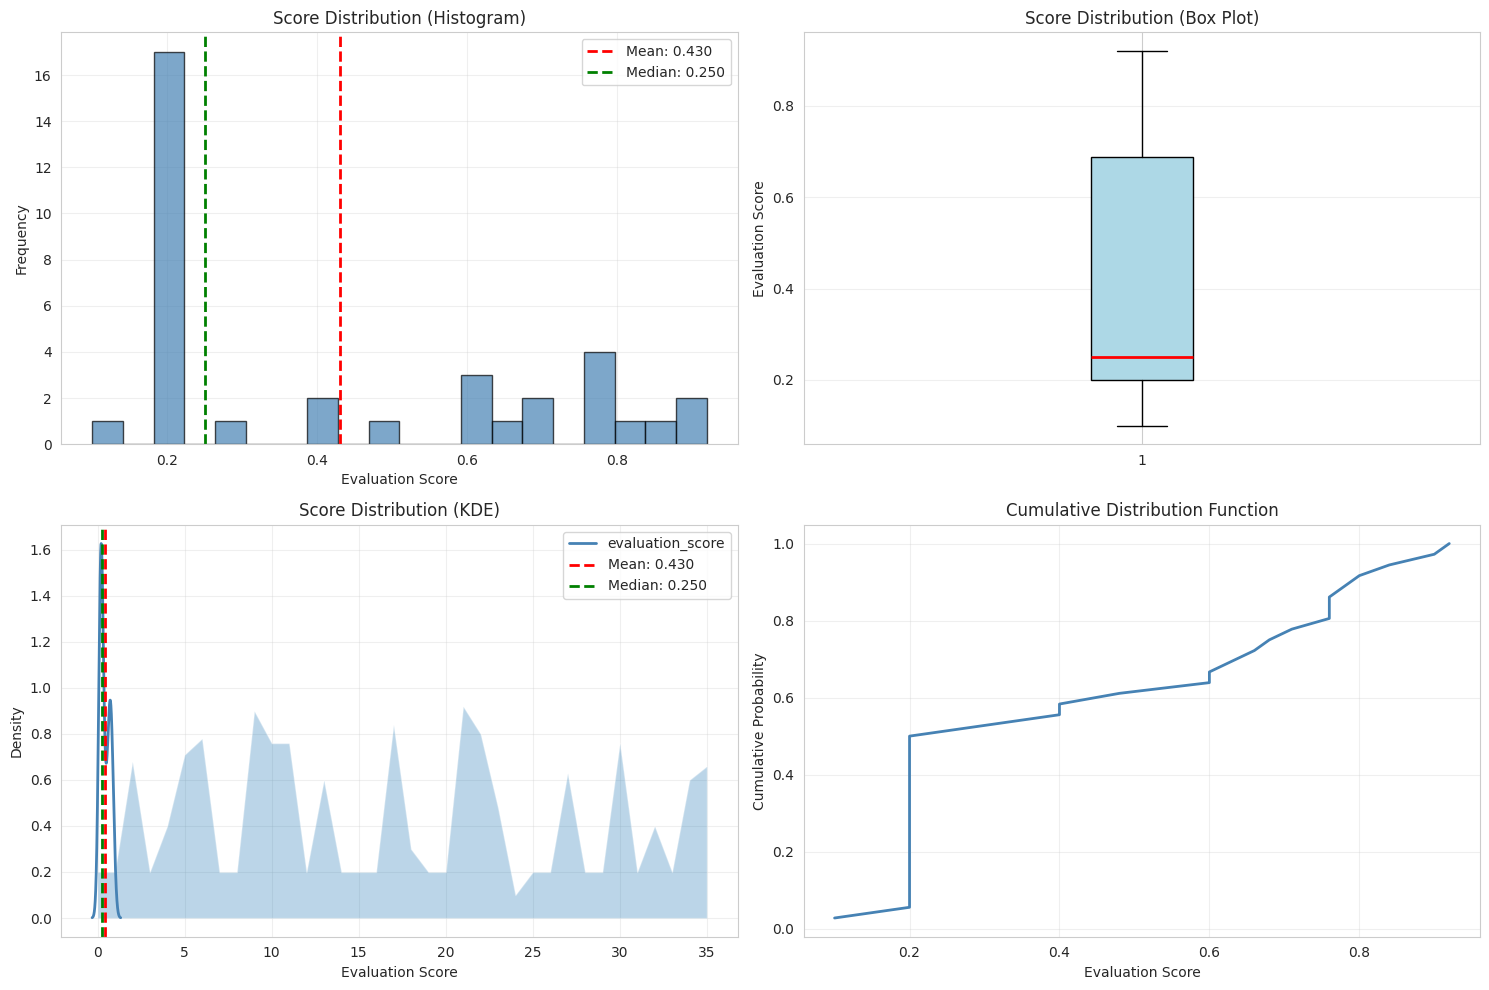

In [4]:
# Create multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram
axes[0, 0].hist(scores, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {scores.mean():.3f}')
axes[0, 0].axvline(scores.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {scores.median():.3f}')
axes[0, 0].set_xlabel('Evaluation Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Score Distribution (Histogram)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot
axes[0, 1].boxplot(scores, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue'),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('Evaluation Score')
axes[0, 1].set_title('Score Distribution (Box Plot)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Kernel Density Plot
scores.plot(kind='kde', ax=axes[1, 0], color='steelblue', linewidth=2)
axes[1, 0].fill_between(scores.index, 0, scores, alpha=0.3)
axes[1, 0].axvline(scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {scores.mean():.3f}')
axes[1, 0].axvline(scores.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {scores.median():.3f}')
axes[1, 0].set_xlabel('Evaluation Score')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Score Distribution (KDE)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Cumulative Distribution
sorted_scores = np.sort(scores)
cumulative = np.arange(1, len(sorted_scores) + 1) / len(sorted_scores)
axes[1, 1].plot(sorted_scores, cumulative, linewidth=2, color='steelblue')
axes[1, 1].set_xlabel('Evaluation Score')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].set_title('Cumulative Distribution Function')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Score Ranges Analysis


=== Score Range Distribution ===
             Count  Percentage
score_range                   
0.0-0.2         42       45.65
0.2-0.4          3        3.26
0.4-0.6         11       11.96
0.6-0.8         32       34.78
0.8-1.0          4        4.35


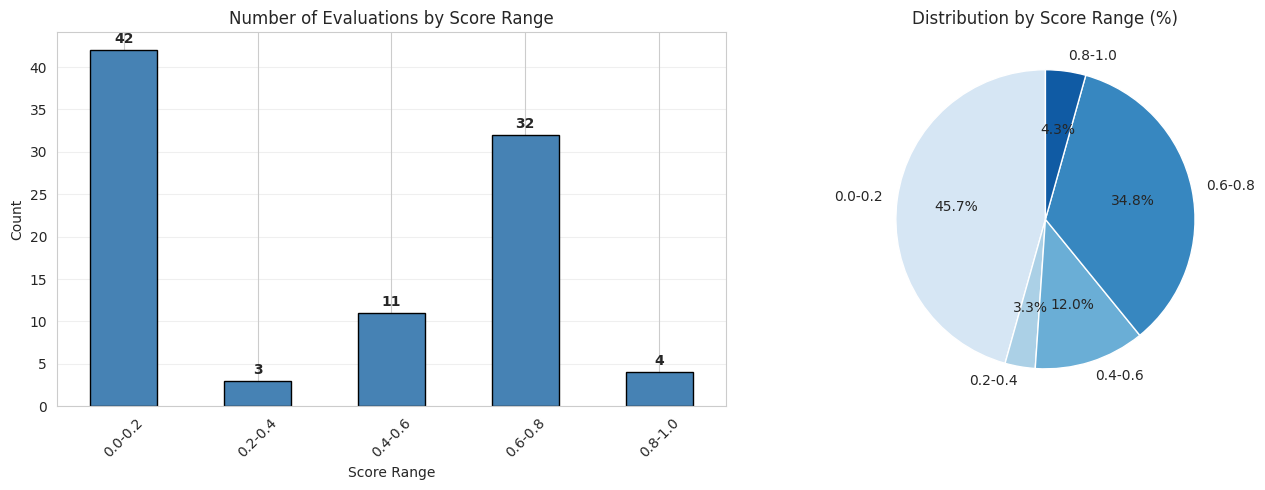

In [9]:
# Create score ranges
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
df['score_range'] = pd.cut(df['evaluation_score'], bins=bins, labels=labels, include_lowest=True)

# Count by range
range_counts = df['score_range'].value_counts().sort_index()
range_pct = (range_counts / len(df) * 100).round(2)

# Create summary table
range_summary = pd.DataFrame({
    'Count': range_counts,
    'Percentage': range_pct
})

print("\n=== Score Range Distribution ===")
print(range_summary)

# Visualize score ranges
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
range_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_xlabel('Score Range')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Evaluations by Score Range')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for i, v in enumerate(range_counts):
    axes[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(range_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues', len(labels)))
axes[1].set_title('Distribution by Score Range (%)')

plt.tight_layout()
plt.show()

## Timeline Analysis

In [ ]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

# Plot scores over time
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Scatter plot with trend
axes[0].scatter(df['timestamp'], df['evaluation_score'], alpha=0.6, s=50, color='steelblue')
axes[0].plot(df['timestamp'], df['evaluation_score'].rolling(window=5, center=True).mean(), 
             color='red', linewidth=2, label='5-eval moving average')
axes[0].set_xlabel('Timestamp')
axes[0].set_ylabel('Evaluation Score')
axes[0].set_title('Evaluation Scores Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Cumulative average
df['cumulative_avg'] = df['evaluation_score'].expanding().mean()
axes[1].plot(df['timestamp'], df['cumulative_avg'], linewidth=2, color='green')
axes[1].axhline(scores.mean(), color='red', linestyle='--', linewidth=1, label=f'Overall Mean: {scores.mean():.3f}')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Cumulative Average Score')
axes[1].set_title('Cumulative Average Score Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Payment vs Score Analysis

In [ ]:
# Analyze relationship between payment and score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(df['payment'], df['evaluation_score'], alpha=0.6, s=50, color='steelblue')
axes[0].set_xlabel('Payment ($)')
axes[0].set_ylabel('Evaluation Score')
axes[0].set_title('Evaluation Score vs Payment')
axes[0].grid(True, alpha=0.3)

# Box plot by payment bins
payment_bins = [0, 10, 20, 30, 50]
payment_labels = ['$0-10', '$10-20', '$20-30', '$30+']
df['payment_range'] = pd.cut(df['payment'], bins=payment_bins, labels=payment_labels, include_lowest=True)

df.boxplot(column='evaluation_score', by='payment_range', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Payment Range')
axes[1].set_ylabel('Evaluation Score')
axes[1].set_title('Score Distribution by Payment Range')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['payment'].corr(df['evaluation_score'])
print(f"\nCorrelation between payment and score: {correlation:.3f}")

## Summary Report

In [ ]:
# Generate summary report
print("="*60)
print("EVALUATION SCORE ANALYSIS SUMMARY")
print("="*60)
print(f"\nModel: GLM-4.7 (OpenRouter)")
print(f"Total Evaluations: {len(df)}")
print(f"Date Range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\nScore Statistics:")
print(f"  Mean:   {scores.mean():.3f}")
print(f"  Median: {scores.median():.3f}")
print(f"  Std:    {scores.std():.3f}")
print(f"  Min:    {scores.min():.3f}")
print(f"  Max:    {scores.max():.3f}")
print(f"\nScore Distribution:")
for idx, row in range_summary.iterrows():
    print(f"  {idx}: {int(row['Count'])} ({row['Percentage']:.1f}%)")
print(f"\nPayment Statistics:")
print(f"  Mean Payment:   ${df['payment'].mean():.2f}")
print(f"  Median Payment: ${df['payment'].median():.2f}")
print(f"  Total Payment:  ${df['payment'].sum():.2f}")
print(f"\nPayment-Score Correlation: {correlation:.3f}")
print("="*60)